In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Wholesale_Customer.csv') 

In [3]:
df.head() 

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [5]:
df.isnull()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False,False


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [6]:
## Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?
df.groupby('Channel').sum() 

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955
Retail,25986,1264414,1521743,2317845,234671,1032270,248988


In [7]:
## Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?
df.groupby('Region').sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327
Oporto,14899,464721,239144,433274,190132,173311,54506
Other,64026,3960577,1888759,2495251,930492,890410,512110


In [99]:
df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen','Region']].groupby('Region').sum() 

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


In [100]:
df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen','Channel']].groupby('Channel').sum() 

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


In [9]:
df.groupby(['Channel','Region']).size().sort_values

<bound method Series.sort_values of Channel  Region
Hotel    Lisbon     59
         Oporto     28
         Other     211
Retail   Lisbon     18
         Oporto     19
         Other     105
dtype: int64>

In [86]:
###1.2. There are 6 different varieties of items are considered.
#### Do all varieties show similar behaviour across Region and Channel?

df.groupby(['Region']).describe().T

Region                        Lisbon        Oporto          Other
Buyer/Spender    count     77.000000     47.000000     316.000000
                 mean     235.000000    317.000000     202.613924
                 std       22.371857     13.711309     143.615303
                 min      197.000000    294.000000       1.000000
                 25%      216.000000    305.500000      79.750000
                 50%      235.000000    317.000000     158.500000
                 75%      254.000000    328.500000     361.250000
                 max      273.000000    340.000000     440.000000
Fresh            count     77.000000     47.000000     316.000000
                 mean   11101.727273   9887.680851   12533.471519
                 std    11557.438575   8387.899211   13389.213115
                 min       18.000000      3.000000       3.000000
                 25%     2806.000000   2751.500000    3350.750000
                 50%     7363.000000   8090.000000    8752.500000
                 75%    15218.000000  14925.500000   17406.500000
                 max    56083.000000  32717.000000  112151.000000
Milk             count     77.000000     47.000000     316.000000
                 mean    5486.415584   5088.170213    5977.085443
                 std     5704.856079   5826.343145    7935.463443
                 min      258.000000    333.000000      55.000000
                 25%     1372.000000   1430.500000    1634.000000
                 50%     3748.000000   2374.000000    3684.500000
                 75%     7503.000000   5772.500000    7198.750000
                 max    28326.000000  25071.000000   73498.000000
Grocery          count     77.000000     47.000000     316.000000
                 mean    7403.077922   9218.595745    7896.363924
                 std     8496.287728  10842.745314    9537.287778
                 min      489.000000   1330.000000       3.000000
                 25%     2046.000000   2792.500000    2141.500000
                 50%     3838.000000   6114.000000    4732.000000
                 75%     9490.000000  11758.500000   10559.750000
                 max    39694.000000  67298.000000   92780.000000
Frozen           count     77.000000     47.000000     316.000000
                 mean    3000.337662   4045.361702    2944.594937
                 std     3092.143894   9151.784954    4260.126243
                 min       61.000000    131.000000      25.000000
                 25%      950.000000    811.500000     664.750000
                 50%     1801.000000   1455.000000    1498.000000
                 75%     4324.000000   3272.000000    3354.750000
                 max    18711.000000  60869.000000   36534.000000
Detergents_Paper count     77.000000     47.000000     316.000000
                 mean    2651.116883   3687.468085    2817.753165
                 std     4208.462708   6514.717668    4593.051613
                 min        5.000000     15.000000       3.000000
                 25%      284.000000    282.500000     251.250000
                 50%      737.000000    811.000000     856.000000
                 75%     3593.000000   4324.500000    3875.750000
                 max    19410.000000  38102.000000   40827.000000
Delicatessen     count     77.000000     47.000000     316.000000
                 mean    1354.896104   1159.702128    1620.601266
                 std     1345.423340   1050.739841    3232.581660
                 min        7.000000     51.000000       3.000000
                 25%      548.000000    540.500000     402.000000
                 50%      806.000000    898.000000     994.000000
                 75%     1775.000000   1538.500000    1832.750000
                 max     6854.000000   5609.000000   47943.000000

In [87]:
###1.2. There are 6 different varieties of items are considered.
#### Do all varieties show similar behaviour across Region and Channel?
df.groupby(['Channel']).describe().T

Channel                         Hotel        Retail
Buyer/Spender    count     298.000000    142.000000
                 mean      238.369128    183.000000
                 std       120.910343    132.136132
                 min         4.000000      1.000000
                 25%       137.250000     61.250000
                 50%       241.500000    166.500000
                 75%       344.500000    303.750000
                 max       440.000000    438.000000
Fresh            count     298.000000    142.000000
                 mean    13475.560403   8904.323944
                 std     13831.687502   8987.714750
                 min         3.000000     18.000000
                 25%      4070.250000   2347.750000
                 50%      9581.500000   5993.500000
                 75%     18274.750000  12229.750000
                 max    112151.000000  44466.000000
Milk             count     298.000000    142.000000
                 mean     3451.724832  10716.500000
                 std      4352.165571   9679.631351
                 min        55.000000    928.000000
                 25%      1164.500000   5938.000000
                 50%      2157.000000   7812.000000
                 75%      4029.500000  12162.750000
                 max     43950.000000  73498.000000
Grocery          count     298.000000    142.000000
                 mean     3962.137584  16322.852113
                 std      3545.513391  12267.318094
                 min         3.000000   2743.000000
                 25%      1703.750000   9245.250000
                 50%      2684.000000  12390.000000
                 75%      5076.750000  20183.500000
                 max     21042.000000  92780.000000
Frozen           count     298.000000    142.000000
                 mean     3748.251678   1652.612676
                 std      5643.912500   1812.803662
                 min        25.000000     33.000000
                 25%       830.000000    534.250000
                 50%      2057.500000   1081.000000
                 75%      4558.750000   2146.750000
                 max     60869.000000  11559.000000
Detergents_Paper count     298.000000    142.000000
                 mean      790.560403   7269.507042
                 std      1104.093673   6291.089697
                 min         3.000000    332.000000
                 25%       183.250000   3683.500000
                 50%       385.500000   5614.500000
                 75%       899.500000   8662.500000
                 max      6907.000000  40827.000000
Delicatessen     count     298.000000    142.000000
                 mean     1415.956376   1753.436620
                 std      3147.426922   1953.797047
                 min         3.000000      3.000000
                 25%       379.000000    566.750000
                 50%       821.000000   1350.000000
                 75%      1548.000000   2156.000000
                 max     47943.000000  16523.000000

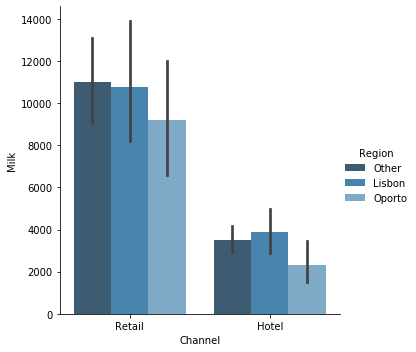

In [10]:
###1.2. There are 6 different varieties of items are considered.
#### Do all varieties show similar behaviour across Region and Channel?

sns.catplot(x='Channel',y='Milk',hue='Region',data=df,palette='Blues_d',kind = 'bar');

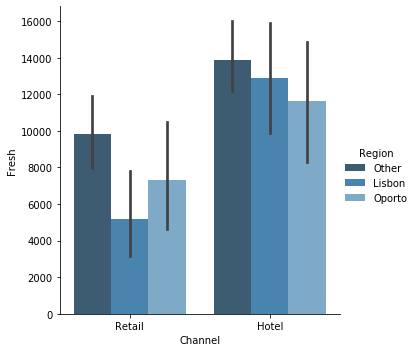

In [11]:
###1.2. There are 6 different varieties of items are considered.
#### Do all varieties show similar behaviour across Region and Channel?
sns.catplot(x='Channel',y='Fresh',hue='Region',data=df,palette='Blues_d',kind = 'bar');

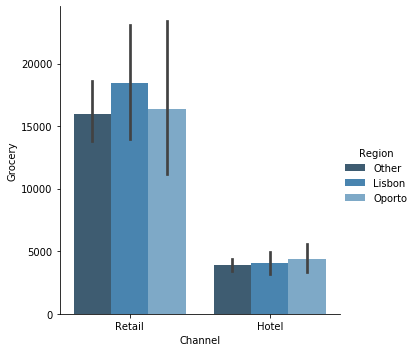

In [12]:
###1.2. There are 6 different varieties of items are considered.
#### Do all varieties show similar behaviour across Region and Channel?
sns.catplot(x='Channel',y='Grocery',hue='Region',data=df,palette='Blues_d',kind = 'bar');

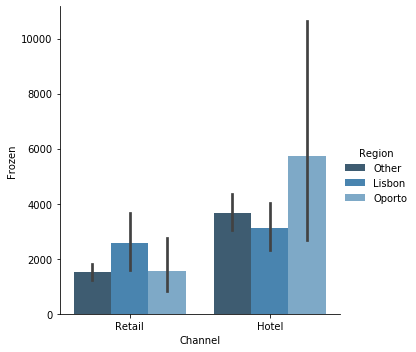

In [13]:
###1.2. There are 6 different varieties of items are considered.
#### Do all varieties show similar behaviour across Region and Channel?
sns.catplot(x='Channel',y='Frozen',hue='Region',data=df,palette='Blues_d',kind = 'bar');

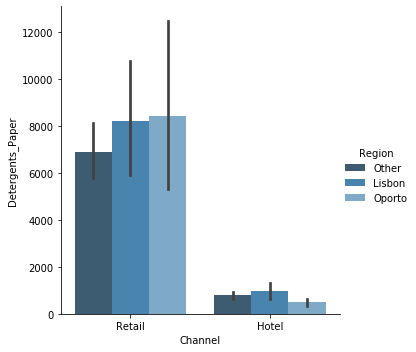

In [14]:
###1.2. There are 6 different varieties of items are considered.
#### Do all varieties show similar behaviour across Region and Channel?
sns.catplot(x='Channel',y='Detergents_Paper',hue='Region',data=df,palette='Blues_d',kind = 'bar');

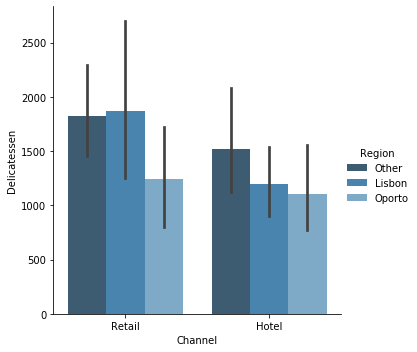

In [15]:
###1.2. There are 6 different varieties of items are considered.
#### Do all varieties show similar behaviour across Region and Channel?
sns.catplot(x='Channel',y='Delicatessen',hue='Region',data=df,palette='Blues_d',kind = 'bar');

In [16]:
### 1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour?
### Which items shows the least inconsistent behaviour?
mean=df['Fresh'].mean()
stdev=df['Fresh'].std()
print('The mean for fresh is',df['Fresh'].mean(),'\n''The standard deviation for fresh is', df['Fresh'].std())
coefficient_of_variance= stdev/mean
print('')
print('The varaince of fresh is',coefficient_of_variance)




The mean for fresh is 12000.297727272728 
The standard deviation for fresh is 12647.328865076894

The varaince of fresh is 1.0539179237473149


In [17]:
### 1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour?
### Which items shows the least inconsistent behaviour?
mean=df['Milk'].mean()
stdev=df['Milk'].std()
print('The mean for milk is',df['Milk'].mean(),'\n''The standard deviation for fresh is', df['Milk'].std())
coefficient_of_variance= stdev/mean
print('')
print('The varaince of milk is',coefficient_of_variance)


The mean for milk is 5796.265909090909 
The standard deviation for fresh is 7380.377174570843

The varaince of milk is 1.2732985840065414


In [18]:
### 1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour?
### Which items shows the least inconsistent behaviour?
mean=df['Frozen'].mean()
stdev=df['Frozen'].std()
print('The mean for Frozen is',df['Frozen'].mean(),'\n''The standard deviation for Frozen is', df['Frozen'].std())
coefficient_of_variance= stdev/mean
print('')
print('The varaince of Frozen is',coefficient_of_variance)

The mean for Frozen is 3071.931818181818 
The standard deviation for Frozen is 4854.673332592367

The varaince of Frozen is 1.5803323836352914


In [19]:
### 1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour?
### Which items shows the least inconsistent behaviour?
mean=df['Grocery'].mean()
stdev=df['Grocery'].std()
print('The mean for Grocery is',df['Grocery'].mean(),'\n''The standard deviation for Grocery is', df['Grocery'].std())
coefficient_of_variance= stdev/mean
print('')
print('The varaince of Grocery is',coefficient_of_variance)

The mean for Grocery is 7951.277272727273 
The standard deviation for Grocery is 9503.162828994346

The varaince of Grocery is 1.1951743730016824


In [20]:
### 1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour?
### Which items shows the least inconsistent behaviour?
mean=df['Detergents_Paper'].mean()
stdev=df['Detergents_Paper'].std()
print('The mean for Detergents_Paper is',df['Detergents_Paper'].mean(),'\n''The standard deviation for Detergents_Paper is', df['Detergents_Paper'].std())
coefficient_of_variance= stdev/mean
print('')
print('The varaince of Detergents_Paper is',coefficient_of_variance)

The mean for Detergents_Paper is 2881.4931818181817 
The standard deviation for Detergents_Paper is 4767.8544479042

The varaince of Detergents_Paper is 1.6546471385005155


In [21]:
### 1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour?
### Which items shows the least inconsistent behaviour?
mean=df['Delicatessen'].mean()
stdev=df['Delicatessen'].std()
print('The mean for Delicatessen is',df['Delicatessen'].mean(),'\n''The standard deviation for Delicatessen is', df['Delicatessen'].std())
coefficient_of_variance= stdev/mean
print('')
print('The varaince of Delicatessen is',coefficient_of_variance)

The mean for Delicatessen is 1524.8704545454545 
The standard deviation for Delicatessen is 2820.1059373693975

The varaince of Delicatessen is 1.8494068981158382


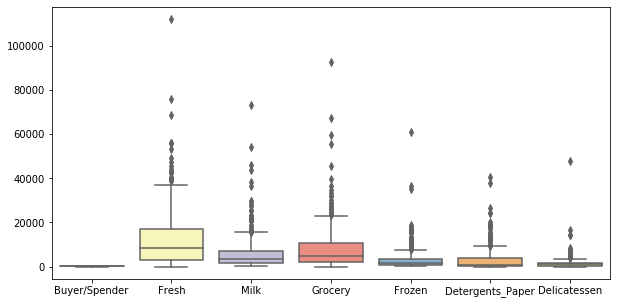

In [22]:
##. 1.4 Are there any outliers in the data?
plt.figure(figsize=(10,5))
sns.boxplot(data=df,palette='Set3');


In [4]:
df1=pd.read_csv('Survey-1.csv')

In [5]:
df1

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [6]:
df1.shape

(62, 14)

In [7]:
df1.columns

Index(['ID', 'Gender', 'Age', 'Class', 'Major', 'Grad Intention', 'GPA',
       'Employment', 'Salary', 'Social Networking', 'Satisfaction', 'Spending',
       'Computer', 'Text Messages'],
      dtype='object')

In [9]:
#2.1.1. Gender and Major
pd.crosstab(df1['Gender'],df1['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [28]:
##2.1.2. Gender and Grad Intention
pd.crosstab(df1['Gender'],df1['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [29]:
##2.1.3. Gender and Employment
pd.crosstab(df1['Gender'],df1['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [30]:
###2.1.4. Gender and Computer
pd.crosstab(df1['Gender'],df1['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [31]:
#### 2.2.1. What is the probability that a randomly selected CMSU student will be male?
### What is the probability that a randomly selected CMSU student will be female?

male = 29
female = 33
total = male + female
total
prob_male = male/total*100
prob_female = female/total*100
print('The probability that a randomly sellected student that will be male is %.2f' % prob_male +'%')
print('The probability that a randomly sellected student that will be female is %.2f' % prob_female +'%')


The probability that a randomly sellected student that will be male is 46.77%
The probability that a randomly sellected student that will be female is 53.23%


In [32]:
### Find the conditional probability of different majors among the male students in CMSU.
### Find the conditional probability of different majors among the female students of CMSU.

male=29
female=33
males_having_major_in_accounting = 4
female_having_major_in_accounting = 3
probability_male_accounting =males_having_major_in_accounting/male*100
probability_female_accounting = 3/33*100
print('The probability of male students in accounting major is %.2f' %probability_male_accounting + '%')
print('The probability of female students in accounting major is %.2f' %probability_female_accounting + '%')

The probability of male students in accounting major is 13.79%
The probability of female students in accounting major is 9.09%


In [33]:
male=29
female=33
males_having_major_in_CIS = 1
female_having_major_in_CIS = 3
probability_male_CIS =males_having_major_in_CIS/male*100
probability_female_CIS = female_having_major_in_CIS/female*100
print('The probability of male students in CIS major is %.2f' %probability_male_CIS + '%')
print('The probability of female students in CIS major is %.2f' %probability_female_CIS + '%')

The probability of male students in CIS major is 3.45%
The probability of female students in CIS major is 9.09%


In [34]:
male=29
female=33
males_having_major_in_Economics_Finance = 4
female_having_major_in_Economics_Finance = 7
probability_male_Economics_Finance =males_having_major_in_Economics_Finance/male*100
probability_female_Economics_Finance = female_having_major_in_Economics_Finance/female*100
print('The probability of male students in Economics/Finance major is %.2f' %probability_male_Economics_Finance + '%')
print('The probability of female students in Economics/Finance major is %.2f' %probability_female_Economics_Finance + '%')

The probability of male students in Economics/Finance major is 13.79%
The probability of female students in Economics/Finance major is 21.21%


In [35]:
male=29
female=33
males_having_major_in_InternationalBusiness = 2
female_having_major_in_InternationalBusiness = 4
probability_male_InternationalBusiness =males_having_major_in_InternationalBusiness/male*100
probability_female_InternationalBusiness = female_having_major_in_InternationalBusiness/female*100
print('The probability of male students in InternationalBusiness major is %.2f' %probability_male_InternationalBusiness + '%')
print('The probability of female students in InternationalBusiness major is %.2f' %probability_female_InternationalBusiness + '%')

The probability of male students in InternationalBusiness major is 6.90%
The probability of female students in InternationalBusiness major is 12.12%


In [36]:
male=29
female=33
males_having_major_in_Management = 6
female_having_major_in_Management = 4
probability_male_Management =males_having_major_in_Management/male*100
probability_female_Management = female_having_major_in_Management/female*100
print('The probability of male students in Management major is %.2f' %probability_male_Management + '%')
print('The probability of female students in Management major is %.2f' %probability_female_Management + '%')

The probability of male students in Management major is 20.69%
The probability of female students in Management major is 12.12%


In [37]:
male=29
female=33
males_having_major_in_Other = 4
female_having_major_in_Other = 3
probability_male_Other =males_having_major_in_Other/male*100
probability_female_Other = female_having_major_in_Other/female*100
print('The probability of male students in Other major is %.2f' %probability_male_Other + '%')
print('The probability of female students in Other major is %.2f' %probability_female_Other + '%')

The probability of male students in Other major is 13.79%
The probability of female students in Other major is 9.09%


In [38]:
male=29
female=33
males_having_major_in_Retailing_Marketing = 5
female_having_major_in_Retailing_Marketing = 9
probability_male_Retailing_Marketing =males_having_major_in_Retailing_Marketing/male*100
probability_female_Retailing_Marketing = female_having_major_in_Retailing_Marketing/female*100
print('The probability of male students in Retailing/Marketing major is %.2f' %probability_male_Retailing_Marketing + '%')
print('The probability of female students in Retailing/Marketing major is %.2f' %probability_female_Retailing_Marketing + '%')

The probability of male students in Retailing/Marketing major is 17.24%
The probability of female students in Retailing/Marketing major is 27.27%


In [39]:
male=29
female=33
males_having_major_in_Undecided = 5
female_having_major_in_Undecided= 9
probability_male_Undecided =males_having_major_in_Undecided/male*100
probability_female_Undecided = female_having_major_in_Undecided/female*100
print('The probability of male students in Undecided major is %.2f' %probability_male_Undecided + '%')
print('The probability of female students in Undecided major is %.2f' %probability_female_Undecided + '%') 

The probability of male students in Undecided major is 17.24%
The probability of female students in Undecided major is 27.27%


In [40]:
##2.2.3. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question: 
###Find the conditional probability of intent to graduate, given that the student is a male. 
###Find the conditional probability of intent to graduate, given that the student is a female.
male=29
female=33
total=62
feMale_intent_to_graduate = 11/33*100
print('The probability of intent to graduate given stdent is female is %.2f'%feMale_intent_to_graduate + '%')
male_intent_to_gaduate = 17/29*100
print('The probability of intent to graduate given stdent is male is %.2f'%male_intent_to_gaduate + '%')


The probability of intent to graduate given stdent is female is 33.33%
The probability of intent to graduate given stdent is male is 58.62%


In [41]:
####Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question: 
###Find the conditional probability of employment status for the male students as well as for the female students.

female_fulltime_prob = 3/33*100
female_parttime_prob = 24/33*100
female_unemployed_prob = 6/33*100
male_fulltime_prob = 7/29*100
male_parttime_prob = 19/29*100
male_unemployed_prob = 3/29*100
print('The probability of female that are full time employed is %2f' % female_fulltime_prob + '%')
print('The probability of female that are part time employed is %2f' % female_parttime_prob + '%')
print('The probability of female that are unemployed is %2f' % female_unemployed_prob + '%')
print('The probability of male that are fulltime employed is %2f' % male_fulltime_prob + '%')
print('The probability of male that are parttime employed is %2f' % male_parttime_prob + '%')
print('The probability of male that are  unemployed is %1f' % male_unemployed_prob + '%')

The probability of female that are full time employed is 9.090909%
The probability of female that are part time employed is 72.727273%
The probability of female that are unemployed is 18.181818%
The probability of male that are fulltime employed is 24.137931%
The probability of male that are parttime employed is 65.517241%
The probability of male that are  unemployed is 10.344828%


In [42]:
###2.2.5. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question: 
###Find the conditional probability of laptop preference among the male students as well as among the female students.

male_laptop_pref = 26
female_laptop_pref = 29
total_female=33
total_male=29
prob_male_pref_lap=26/total_male*100
prob_female_pref_lap=29/total_female*100
print('The probability of male preference for laptop is %2f' % prob_male_pref_lap + '%')
print('The probability of female preference for laptop is %2f' % prob_female_pref_lap + '%') 

The probability of male preference for laptop is 89.655172%
The probability of female preference for laptop is 87.878788%


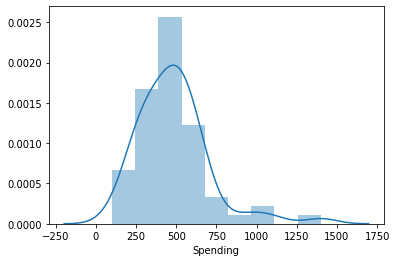

In [113]:
####2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution. 
#### Write a note summarizing your conclusions. [Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]
sns.distplot(df1['Spending']);

In [103]:
print(df1['Spending'].mean())
print(df1['Spending'].std())

482.01612903225805
221.95380496596204


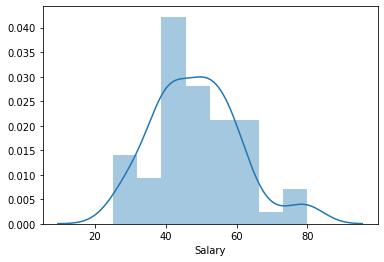

In [45]:
####2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution. 
#### Write a note summarizing your conclusions. [Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]
sns.distplot(df1['Salary']);

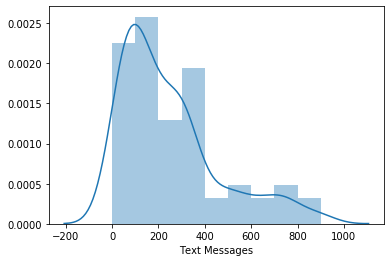

In [46]:
####2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution. 
#### Write a note summarizing your conclusions. [Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]
sns.distplot(df1['Text Messages']);

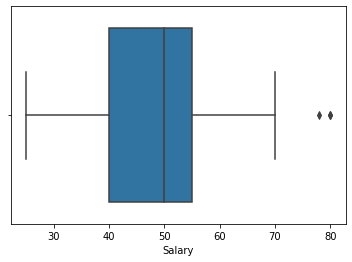

In [117]:
####2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution. 
#### Write a note summarizing your conclusions. [Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]
sns.boxplot(df1['Salary']);

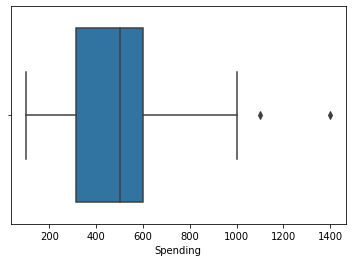

In [118]:
####2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution. 
#### Write a note summarizing your conclusions. [Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]
sns.boxplot(df1['Spending']);

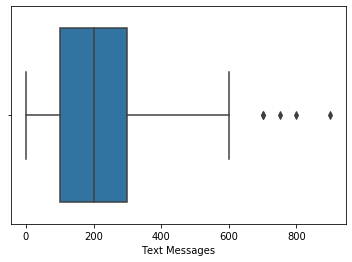

In [49]:
####2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution. 
#### Write a note summarizing your conclusions. [Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]
sns.boxplot(df1['Text Messages']);

In [50]:
df3=pd.read_csv('A & B shingles-1.csv') 

In [51]:
df3.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [52]:
df3.describe() 

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [53]:
df3.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [54]:
df3.isnull().sum()

A    0
B    5
dtype: int64

In [55]:
###3.1 Do you think that the population means for shingles A and B are equal? 
###Form the hypothesis and conduct the test of the hypothesis. 
###What assumption do you need to check before the test for equality of means is performed?
print('Mean of  A is',round(df3['A'].mean(),4))
print('Mean of  B is',round(df3['B'].mean(),4))
print('Standard deviation of A is',round(df3['A'].std(),4))  
print('Standard deviation of B is',round(df3['B'].std(),4))  
t_stat, p_value=ttest_ind(df3['A'],df3['B'],nan_policy='omit')
print('The T score is',t_stat,'and the P value is', p_value)

Mean of  A is 0.3167
Mean of  B is 0.2735
Standard deviation of A is 0.1357
Standard deviation of B is 0.1373
The T score is 1.2896282719661123 and the P value is 0.2017496571835306
